# 文本数据分析

## 主要使用的工具是NLTK(Natural Language Toolkit)

### 1. 安装nltk+语料库

#### 安装nltk

In [1]:
pip install nltk


The following command must be run outside of the IPython shell:

    $ pip install nltk

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


#### 安装语料库

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

True

### 2. NLTK的基本使用

#### 实现文本数据分析的主要工作

##### a) 语料库： nltk.corpus

##### b) 分词(tokenize) ：中英文分词

其中中文分词使用jieba库，要区分精确模式与全模式

In [2]:
import jieba

seg_list = jieba.cut("欢迎来到浩浩的blog空间", cut_all=True)
print("全模式:"+"/".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.752 seconds.
Prefix dict has been built succesfully.


全模式:欢迎/迎来/来到/浩浩/的/blog/空间


全模式会出现重复的词语，会将所有可能的分词展现。欢迎/迎来/来到

In [4]:
import jieba

seg_list = jieba.cut("欢迎来到浩浩的blog空间", cut_all=False)
print("精确模式："+"/".join(seg_list))

精确模式：欢迎/来到/浩浩/的/blog/空间


##### c) 处理特殊字符

需要将一些表情，标点符号，使用<em>正则表达式</em>去除无用字符

##### d) 词形问题

文本是否涉及到语法问题，或<font color=#FF5151>只关心指定的词汇是否出现->词形归一化</font>

词干提取(stemming)：将ing,ed去掉，只保留单词主干

In [6]:
#PorterStemmer
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
print(porter_stemmer.stem('looked'))
print(porter_stemmer.stem('looking'))
print(porter_stemmer.stem('went'))

look
look
went


In [17]:
#SnowballStemmer
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')
print(snowball_stemmer.stem('looked'))
print(snowball_stemmer.stem('looking'))
      

look
look


词形归并(lemmatization): 将单词的各种形态归并为一种形式

In [13]:
from nltk.stem import WordNetLemmatizer # wordnet语料库

wordnet_lematizer = WordNetLemmatizer()
print(wordnet_lematizer.lemmatize('cats')) # 默认把词语看成名词来进行归并
print(wordnet_lematizer.lemmatize('boxes'))
print(wordnet_lematizer.lemmatize('are'))
print(wordnet_lematizer.lemmatize('went'))

cat
box
are
went


In [12]:
print(wordnet_lematizer.lemmatize('are', pos='v')) # 标注为v说明将词语看做动词来进行归并 
print(wordnet_lematizer.lemmatize('went', pos='v'))

be
go


##### e) 词性标注（Part of Speech):nltk.word_tokenize()

In [16]:
import nltk

words = nltk.word_tokenize('Python is a widely used programming language.') # 分词
print(words)
print(nltk.pos_tag(words)) # averaged_perceptron_tagger

['Python', 'is', 'a', 'widely', 'used', 'programming', 'language', '.']
[('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('widely', 'RB'), ('used', 'VBN'), ('programming', 'NN'), ('language', 'NN'), ('.', '.')]


##### f) 停用词（StopWords):一般都是人为输入的，可以使用中文停用词库
http://www.ranks.nl/stopwords

In [22]:
from nltk.corpus import stopwords

words = nltk.word_tokenize('Python is a widely used programming language.')
filtered_words = [word for word in words if word not in stopwords.words('english')]
print('原始词:',words)
print('去除停用词后',filtered_words)

原始词: ['Python', 'is', 'a', 'widely', 'used', 'programming', 'language', '.']
去除停用词后 ['Python', 'widely', 'used', 'programming', 'language', '.']


#### NLTK中典型的文本预处理流程

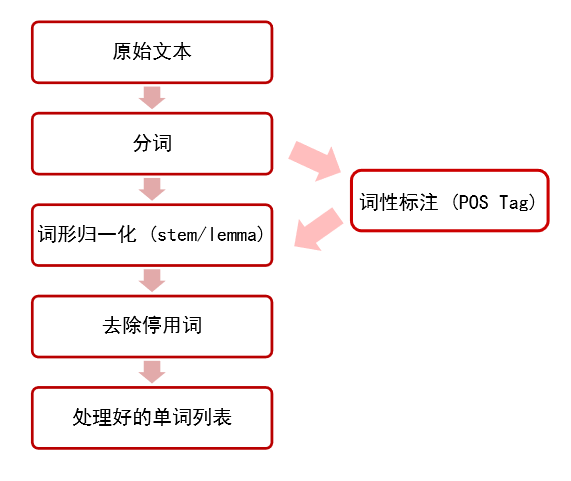

In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

raw_text = 'Life is like a box of chocolates. You never know what you\'re gonna get.'

#分词
raw_words = nltk.word_tokenize(raw_text)

#词形归一化
"""
1. 归一化中间可以使用词性标注来精确每个词的词性，并根据词性来进行归一化。
2. 或者通过搜寻某种词性来获得感兴趣的词性内容来进行分析
"""
wordnet_lematizer = WordNetLemmatizer()
words = [wordnet_lematizer.lemmatize(raw_word) for raw_word in raw_words]

#去除停用词
filtered_words = [word for word in words if word not in stopwords.words('english')]

print('原始文本:', raw_text)
print('预处理结果:',filtered_words)

原始文本: Life is like a box of chocolates. You never know what you're gonna get.
预处理结果: ['Life', 'like', 'box', 'chocolate', '.', 'You', 'never', 'know', "'re", 'gon', 'na', 'get', '.']


## 情感分析

目标：预处理得到的字符串->向量化

### 人工标记制作的情感字典

1. 根据关键词匹配
2. AFINN-111

### 机器学习模型实现情感分析(nltk.classify)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier

text1 = 'I like the movie so much!'
text2 = 'That is a good movie.'
text3 = 'This is a great one.'
text4 = 'This is a really bad movie.'
text5 = 'This is a terrible movie.'

def proc_text(text):
    """
    预处理文本
    """
    #分词
    raw_words = nltk.word_tokenize(text)
    
    #词形归一化
    wordnet_lematizer = WordNetLemmatizer()
    words = [wordnet_lematizer.lemmatize(raw_word) for raw_word in raw_words]
    
    #去除停用词
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    
    #